In [1]:
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))
module_dir = str(script_dir.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

import num_gan as ng
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

C:\Users\pinak\Documents\GitHub\GAN


In [2]:
data = np.genfromtxt('../experiments/learning_attractors/attractors/attractor_l63_1000_500.csv', delimiter=',', dtype=np.float32)[:100]
gan = ng.NumGAN(16, 3, 3, 2, name='attractor_sampler')
gan.load(path='../experiments/learning_attractors/l63_attractor_sampler')

In [3]:
mask = np.array([1, 0, 1], dtype=np.float32)
com = ng.NumCompleter(gan, mask, lam=0.1)
#com.load()
com.train(data, 100000)

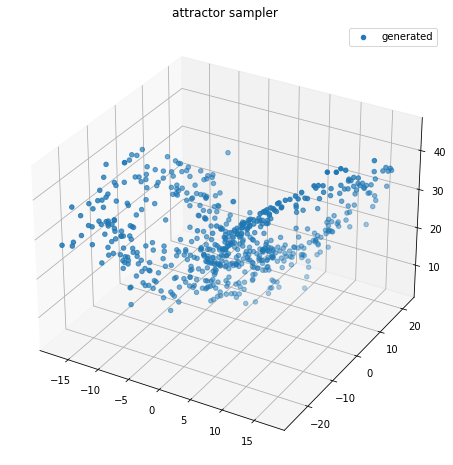

In [4]:
n = 600
noise = tf.random.normal([n, 2])
gen = gan.generator(noise, training=False)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gen[:, 0], gen[:, 1], gen[:, 2], label='generated')
#ax.scatter(data[0:n, 0], data[0:n, 1], data[0:n, 2], label='true')
ax.set_title('attractor sampler')
plt.legend()
plt.show()

In [5]:
incmp = tf.math.multiply(mask, data)
cmp = com.complete(incmp)
data - cmp

<tf.Tensor: shape=(100, 3), dtype=float32, numpy=
array([[ 0.00000000e+00, -1.72625542e-01,  0.00000000e+00],
       [ 0.00000000e+00, -9.57948685e-01,  0.00000000e+00],
       [ 0.00000000e+00, -3.48111224e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.28591471e+01,  0.00000000e+00],
       [ 0.00000000e+00, -1.01753616e+01,  0.00000000e+00],
       [ 0.00000000e+00,  5.69814682e-01,  0.00000000e+00],
       [ 0.00000000e+00, -1.83219528e+01,  0.00000000e+00],
       [ 0.00000000e+00, -3.05261650e+01,  0.00000000e+00],
       [ 0.00000000e+00,  1.11820221e-01,  0.00000000e+00],
       [ 0.00000000e+00,  4.49514389e-02,  0.00000000e+00],
       [ 0.00000000e+00,  1.56914711e-01,  0.00000000e+00],
       [ 0.00000000e+00,  2.91286087e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.44005752e+00,  0.00000000e+00],
       [ 0.00000000e+00,  4.98652458e-01,  0.00000000e+00],
       [ 0.00000000e+00, -1.10442123e+01,  0.00000000e+00],
       [ 0.00000000e+00,  3.24393272e+00,  0.00000

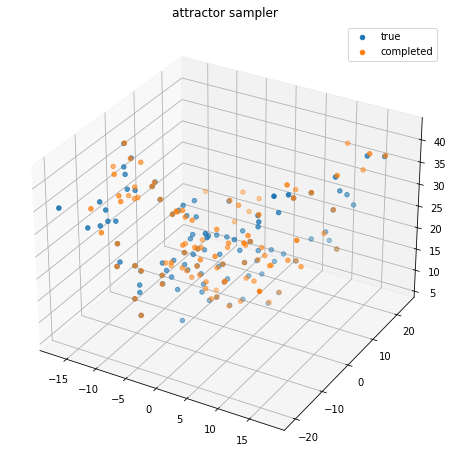

In [6]:
n = 1000
pcmp = tf.math.multiply(mask, cmp)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(pcmp[0:n, 0], pcmp[0:n, 1], pcmp[0:n, 2], label='incomplete')
ax.scatter(data[0:n, 0], data[0:n, 1], data[0:n, 2], label='true')
ax.scatter(cmp[0:n, 0], cmp[0:n, 1], cmp[0:n, 2], label='completed')
ax.set_title('attractor sampler')
plt.legend()
plt.show()

In [7]:
tf.reduce_mean(tf.keras.losses.mean_absolute_error(data[:1000], cmp))

<tf.Tensor: shape=(), dtype=float32, numpy=1.6052959>

In [8]:
pcmp

<tf.Tensor: shape=(100, 3), dtype=float32, numpy=
array([[  4.998597  ,   0.        ,   8.151573  ],
       [ 17.087893  ,   0.        ,  41.798214  ],
       [ -0.41956365,  -0.        ,  26.681952  ],
       [ -5.578119  ,   0.        ,  19.0401    ],
       [-12.414579  ,  -0.        ,  30.421488  ],
       [ -6.2158647 ,  -0.        ,  29.17224   ],
       [ -4.03835   ,   0.        ,  19.243942  ],
       [-10.186573  ,   0.        ,  22.589417  ],
       [ -9.715447  ,  -0.        ,  34.1867    ],
       [ -3.072216  ,  -0.        ,  21.813524  ],
       [ -5.816668  ,  -0.        ,  16.387974  ],
       [-13.790847  ,  -0.        ,  34.09705   ],
       [ -4.221272  ,  -0.        ,  27.53002   ],
       [ -2.2681592 ,  -0.        ,  16.726711  ],
       [ -7.7781124 ,  -0.        ,  15.772465  ],
       [-13.052623  ,  -0.        ,  38.637783  ],
       [ -1.4417076 ,   0.        ,  23.790176  ],
       [  0.07091699,   0.        ,  13.929262  ],
       [  0.57993835,   0.      

In [9]:
data

array([[  4.998597  ,   9.692905  ,   8.151573  ],
       [ 17.087893  ,  13.899544  ,  41.798214  ],
       [ -0.41956365,  -4.899146  ,  26.681952  ],
       [ -5.578119  ,  -8.323218  ,  19.0401    ],
       [-12.414579  , -13.938521  ,  30.421488  ],
       [ -6.2158647 ,  -2.4392173 ,  29.17224   ],
       [ -4.03835   ,  -5.16659   ,  19.243942  ],
       [-10.186573  , -14.711246  ,  22.589417  ],
       [ -9.715447  ,  -4.202472  ,  34.1867    ],
       [ -3.072216  ,  -2.5372255 ,  21.813524  ],
       [ -5.816668  ,  -9.231307  ,  16.387974  ],
       [-13.790847  , -13.75271   ,  34.09705   ],
       [ -4.221272  ,  -0.52014834,  27.53002   ],
       [ -2.2681592 ,  -3.1091988 ,  16.726711  ],
       [ -7.7781124 , -13.116082  ,  15.772465  ],
       [-13.052623  ,  -6.95166   ,  38.637783  ],
       [ -1.4417076 ,   0.8058626 ,  23.790176  ],
       [  0.07091699,   0.24033505,  13.929262  ],
       [  0.57993835,   1.1039878 ,   8.202204  ],
       [  3.9731228 ,   7.93419